In [13]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# read in data, using KORS price (Yahoo Finance) as example

d = pd.read_csv("KORS.csv")
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-13,60.880001,62.959999,60.560001,62.380001,62.380001,3333800
1,2018-02-14,62.270000,63.480000,61.820000,63.380001,63.380001,3041100
2,2018-02-15,63.900002,64.769997,63.400002,64.730003,64.730003,3445000
3,2018-02-16,64.400002,64.449997,63.259998,63.900002,63.900002,3042800
4,2018-02-20,63.490002,64.220001,62.650002,63.970001,63.970001,3731500


In [10]:
# because it's time series, parse the Date column and use it as index
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m-%d")

d = pd.read_csv("KORS.csv", parse_dates=["Date"], date_parser=dateparse, index_col="Date")
d.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-13,60.880001,62.959999,60.560001,62.380001,62.380001,3333800
2018-02-14,62.270000,63.480000,61.820000,63.380001,63.380001,3041100
2018-02-15,63.900002,64.769997,63.400002,64.730003,64.730003,3445000
2018-02-16,64.400002,64.449997,63.259998,63.900002,63.900002,3042800
2018-02-20,63.490002,64.220001,62.650002,63.970001,63.970001,3731500


In [11]:
# general overview of data

d.describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,64.976160,65.811920,64.157040,65.041760,65.041760,2.441453e+06
std,2.653056,2.679817,2.680201,2.683449,2.683449,1.907651e+06
min,57.599998,60.250000,57.099998,57.389999,57.389999,9.492000e+05
25%,62.459999,63.340000,61.820000,62.900002,62.900002,1.578100e+06
50%,65.260002,66.220001,64.690002,65.500000,65.500000,2.003900e+06
75%,67.120003,67.839996,66.260002,66.970001,66.970001,2.669600e+06
max,71.760002,73.250000,71.120003,72.669998,72.669998,1.826330e+07


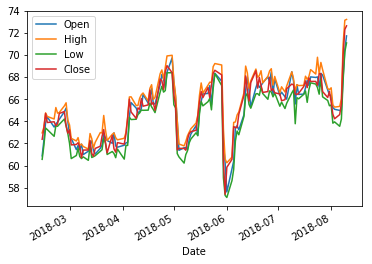

In [18]:
# plot price vs. time

price = d[["Open", "High", "Low", "Close"]]
price.plot()

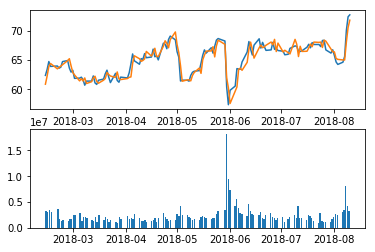

In [65]:


fig, axs = plt.subplots(2)

axs[0, ].plot(price["Close"])
axs[0, ].plot(price["Open"])
axs[1, ].bar(d.index, d["Volume"])

plt.show()

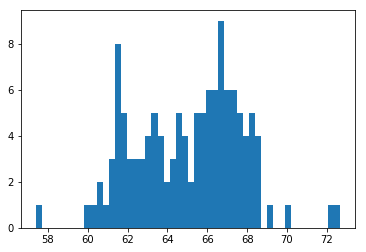

In [23]:
# histogram of prices. n, bins, patches are not used here. refer to https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

n, bins, patches = plt.hist(price["Close"], bins = 50)


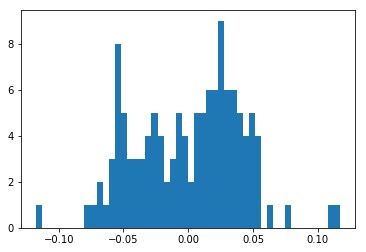

In [26]:
# normalized histogram

norm = (price["Close"] - np.mean(price["Close"])) / np.mean(price["Close"])

n, bins, patches = plt.hist(norm, bins = 50)